In [1]:
# preprocessing - 1

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# Read the raw dataset
data = pd.read_csv("raw_dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   commentId              2127 non-null   object
 1   videoId                2127 non-null   object
 2   textDisplay            2127 non-null   object
 3   textOriginal           2126 non-null   object
 4   authorDisplayName      2127 non-null   object
 5   authorProfileImageUrl  2127 non-null   object
 6   authorChannelUrl       2127 non-null   object
 7   authorChannelId        2127 non-null   object
 8   canRate                2127 non-null   bool  
 9   viewerRating           2127 non-null   object
 10  likeCount              2127 non-null   int64 
 11  publishedAt            2127 non-null   object
 12  updatedAt              2127 non-null   object
 13  canReply               2127 non-null   bool  
 14  totalReplyCount        2127 non-null   int64 
 15  isPublic             

In [5]:
data

,commentId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic
0,Ugz31fdBAylSpjAK0-J4AaABAg,DwQJ_NPQWWo,what a cool guy doing this talk,what a cool guy doing this talk,Wes Bos,https://yt3.ggpht.com/ZaIWJVIs2-XoPCTqQjbulMg9...,http://www.youtube.com/channel/UCoebwHSTvwalAD...,UCoebwHSTvwalADTJhps0emA,True,none,2,2022-11-10T16:56:32Z,2022-11-10T16:56:32Z,True,0,True
1,UgwQ6rxo58QlldFcl_94AaABAg,DwQJ_NPQWWo,async await gives us synchronous looking code ...,async await gives us synchronous looking code ...,Ogunkayode Oluwaseun,https://yt3.ggpht.com/ytc/AGIKgqMYfheo-PyLXI55...,http://www.youtube.com/channel/UCGwPYPyF7YctyT...,UCGwPYPyF7YctyTym6pPUikQ,True,none,1,2022-10-09T12:53:02Z,2022-10-09T12:53:02Z,True,0,True
2,UgxISXw-cKLU_0jsOVl4AaABAg,DwQJ_NPQWWo,Awesome! Very well explained.,Awesome! Very well explained.,Dcode Show,https://yt3.ggpht.com/1c_pyiORWOYqxDKDsZEdeNT-...,http://www.youtube.com/channel/UCpx-GDcXPnb-5u...,UCpx-GDcXPnb-5uhO4-95hiQ,True,none,0,2022-09-29T15:38:23Z,2022-09-29T15:38:23Z,True,0,True
3,UgytMBUh3POB5H_Yiu14AaABAg,DwQJ_NPQWWo,Every F-ing video on this subject i watch i fi...,Every F-ing video on this subject i watch i fi...,Nesa,https://yt3.ggpht.com/ytc/AGIKgqMCWQy6MLUYjWMQ...,http://www.youtube.com/channel/UCiRjEDjlKKGHGm...,UCiRjEDjlKKGHGmGqahsq0OQ,True,none,0,2022-06-05T12:54:01Z,2022-06-05T12:54:01Z,True,0,True
4,UgwIceFs6QYwUrb8sq54AaABAg,DwQJ_NPQWWo,There&#39;s a chick in the crowd about to say ...,"There's a chick in the crowd about to say ""can...",CyberOne,https://yt3.ggpht.com/0HrWlmN4EdxOQgKdzPwD4MDk...,http://www.youtube.com/channel/UCPq9qa3WPsp8Ds...,UCPq9qa3WPsp8DspPi9-OxMA,True,none,1,2022-04-26T20:42:16Z,2022-04-26T20:42:16Z,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,Ugw2ZOm-UqqTtiqqs5t4AaABAg,WPqXP_kLzpo,quokka is not working for me. I downloaded and...,quokka is not working for me. I downloaded and...,Rafael Jauregui,https://yt3.ggpht.com/ytc/AGIKgqMXt9hU15Ecx3bX...,http://www.youtube.com/channel/UCSn40Sdmnz9cWC...,UCSn40Sdmnz9cWCnBr8NFOhQ,True,none,0,2022-05-12T19:55:24Z,2022-05-12T19:55:24Z,True,0,True
2123,UgyPuRNTSDDRRHDdZtV4AaABAg,WPqXP_kLzpo,how to add background color in path in your te...,how to add background color in path in your te...,シルエットsil,https://yt3.ggpht.com/ytc/AGIKgqMZNcqXlOd1q7eE...,http://www.youtube.com/channel/UCXxfeMOtvBUc4y...,UCXxfeMOtvBUc4yxax33e_GA,True,none,0,2022-05-01T04:27:05Z,2022-05-01T04:27:05Z,True,0,True
2124,UgzQ0I__f2cZgMH9qrB4AaABAg,WPqXP_kLzpo,You just made my day with this vid THANK YOU.,You just made my day with this vid THANK YOU.,BD,https://yt3.ggpht.com/ytc/AGIKgqOvMW9KpTg3GOXr...,http://www.youtube.com/channel/UCBILSkkBP-dWch...,UCBILSkkBP-dWchjf58j7E0A,True,none,0,2022-04-06T18:20:57Z,2022-04-06T18:20:57Z,True,0,True
2125,UgwfsqG0ajRJGL20Ljp4AaABAg,WPqXP_kLzpo,I downloaded Python 3.9 already. Do I still ne...,I downloaded Python 3.9 already. Do I still ne...,C Phillips,https://yt3.ggpht.com/ytc/AGIKgqNA_F7R_6n7Bldk...,http://www.youtube.com/channel/UCG8Y0RkJPWhyuf...,UCG8Y0RkJPWhyufVKUsPzPug,True,none,0,2022-04-02T17:20:28Z,2022-04-02T17:20:28Z,True,0,True


In [6]:
# Drop the columns that are not required
data = data.drop(columns = ['commentId', 'videoId', 'authorDisplayName', 'authorProfileImageUrl', 'authorChannelUrl', 'authorChannelId', 
    'canRate', 'viewerRating', 'canReply', 'isPublic', 'publishedAt', 'updatedAt', 'likeCount', 'totalReplyCount', 'textDisplay'])

In [7]:
# removing the null value row
data = data[data['textOriginal'].notnull()]

In [8]:
# Remove urls, special characters, emojis and lowercase the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters and emojis
    text = re.sub(r'[^\w\s]', '', text)
    
    # Lowercase the text
    text = text.lower()
    
    return text

In [9]:
# Apply the clean_text function to the textOriginal column
data['text_original_cleaned'] = data['textOriginal'].apply(clean_text)
data = data.drop(columns = ['textOriginal'])

In [10]:
# Filter out comments with less than 5 characters and more than 150 characters
data = data[data['text_original_cleaned'].str.len() >= 5]
data = data[data['text_original_cleaned'].str.len() <= 150]

In [11]:
# preparing the dataset
comments = data['text_original_cleaned']

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_comments(comments):
    processed_comments = []
    stop_words = set(stopwords.words('english'))

    for comment in comments:
        # Tokenize the comment
        tokens = word_tokenize(comment.lower())
        
        # Remove stop words and punctuation
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        
        processed_comments.append(filtered_tokens)
    
    return processed_comments


In [13]:
from gensim import corpora

def extract_features(comments):
    # Create a dictionary from the comments
    dictionary = corpora.Dictionary(comments)
    
    # Create a bag-of-words corpus
    corpus = [dictionary.doc2bow(comment) for comment in comments]
    
    return dictionary, corpus

In [14]:
from gensim.models import LdaModel

def train_lda_model(corpus, num_topics, dictionary, random_state):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=random_state)
    return lda_model


In [15]:
def perform_inference(data, lda_model, dictionary):
    labeled_comments = []
    identified_requirements = []

    for index, row in data.iterrows():
        comment = row['comment_cleaned']
        user_requirement = row['is_user_request']

        processed_comment = preprocess_comments([comment])
        comment_bow = dictionary.doc2bow(processed_comment[0])
        topic_distribution = lda_model.get_document_topics(comment_bow)

        isRequirement = 0
        # add the topic_id and topic_probability to an array
        topic_details = []

        for topic in topic_distribution:
            topic_id, topic_prob = topic
#             print(comment, " - ", topic_id, " - ", topic_prob)
            topic_probability = topic_prob
            topic_details.append((topic_id, topic_probability))

        # get the array element with the highest probability
        topic_details.sort(key=lambda x: x[1], reverse=True)
        topic_id, topic_probability = topic_details[0]
        if (topic_id == 2):   
            isRequirement = 1
            identified_requirements.append(comment)

        labeled_comments.append((comment, isRequirement, user_requirement))

    labeled_data = pd.DataFrame(labeled_comments, columns=['comment', 'is_requirement', 'actual_result'])
    return labeled_data, identified_requirements

In [16]:
def calculate_accuracy(labeled_data):
    correct_predictions = sum(labeled_data['is_requirement'] == labeled_data['actual_result'])
    total_predictions = len(labeled_data)
    accuracy = correct_predictions / total_predictions * 100
    return accuracy

In [17]:
def test_from_txt_file(df, lda_model, dictionary):
    identified_requirements = []

    for index, row in df.iterrows():
        comment = row['comments']

        processed_comment = preprocess_comments([comment])
        comment_bow = dictionary.doc2bow(processed_comment[0])
        topic_distribution = lda_model.get_document_topics(comment_bow)

        isRequirement = 0
        # add the topic_id and topic_probability to an array
        topic_details = []

        for topic in topic_distribution:
            topic_id, topic_prob = topic
#             print(comment, " - ", topic_id, " - ", topic_prob)
            topic_probability = topic_prob
            topic_details.append((topic_id, topic_probability))

        # get the array element with the highest probability
        topic_details.sort(key=lambda x: x[1], reverse=True)
        topic_id, topic_probability = topic_details[0]
        if topic_id == 2 and topic_probability > 0.5:   
            isRequirement = 1
            identified_requirements.append(comment)

    return identified_requirements

In [18]:
# Step 1: Preprocess the comments
processed_comments = preprocess_comments(comments)

In [19]:
processed_comments

[['cool', 'guy', 'talk'],
 ['async',
  'await',
  'gives',
  'us',
  'synchronous',
  'looking',
  'code',
  'without',
  'downside',
  'writing',
  'synchronous',
  'code',
  'call',
  'back',
  'hell'],
 ['awesome', 'well', 'explained'],
 ['theres', 'chick', 'crowd', 'say', 'keep', 'cause', 'im', 'trying', 'sleep'],
 ['best', 'proceeding'],
 ['beginning',
  'said',
  'javascript',
  'wait',
  'javascript',
  'node',
  'js',
  'nonblocking',
  'nature'],
 ['beautiful', 'stage', 'even', 'slides', 'aesthetically', 'pleasing'],
 ['aysync', 'await'],
 ['thank', 'brother', 'helped', 'lot'],
 ['still', 'cant', 'get', 'fact', 'people', 'laying', 'audience'],
 ['starting', 'video', 'confidence', 'asyncawait', 'watching', 'confidence'],
 ['write',
  'thing',
  'today',
  'code',
  'stackoverflow',
  'wanted',
  'know',
  'guess',
  'youtube',
  'recommend'],
 ['see', 'name', 'wes', 'bos', 'like', 'need', 'watch', 'video'],
 ['thanks', 'wesbos', 'really', 'boss'],
 ['get', 'slides', 'love'],
 [

In [20]:
# Step 2: Feature extraction
dictionary, corpus = extract_features(processed_comments)

In [21]:
# Step 3: Train LDA model
num_topics = 6
lda_model = train_lda_model(corpus, num_topics, dictionary, 56)

In [22]:
# Step 4: Inference (using a manually labelled data set of 112 records)
# Prepare the dataset
data = pd.read_csv("cleaned_labeled_data.csv", header=0)

#labeled_data, identified_requirements = perform_inference(data, lda_model, dictionary)
#labeled_data.to_csv("output.csv", index=False)

In [23]:
# Step 5: Evaluation
accuracy = calculate_accuracy(labeled_data)
print('Using the existing labelled data set - Accuracy: ', accuracy)

Using the existing labelled data set - Accuracy:  67.85714285714286


In [24]:
# Perplexity -> evaluate topic models (how well the model predicts the held-out data) - lower the better
perplexity = lda_model.log_perplexity(corpus)
print("Perplexity: ", perplexity)

Perplexity:  -7.851373458642318


In [25]:
test_comments = pd.read_csv("input.txt", header=0)
output = test_from_txt_file(test_comments, lda_model, dictionary)

In [26]:
for result in output:
    print(result)

Could you make a tutorial on Golang?
Please explain more


In [27]:
# validation

In [28]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [29]:
# Define a function to calculate coherence score
def calculate_coherence(dictionary, corpus, texts, num_topics):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=56)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

In [30]:
# Define a range of topic numbers to try
min_topics = 2
max_topics = 10
step = 1
topic_nums = range(min_topics, max_topics+1, step)

In [31]:
# Calculate coherence scores for different topic numbers
coherence_scores = []
for num_topics in topic_nums:
    coherence_score = calculate_coherence(dictionary, corpus, processed_comments, num_topics)
    coherence_scores.append(coherence_score)

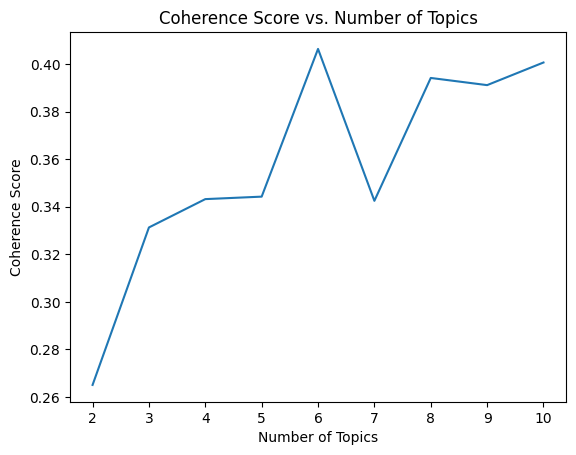

In [32]:
# Plot the coherence scores
plt.plot(topic_nums, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

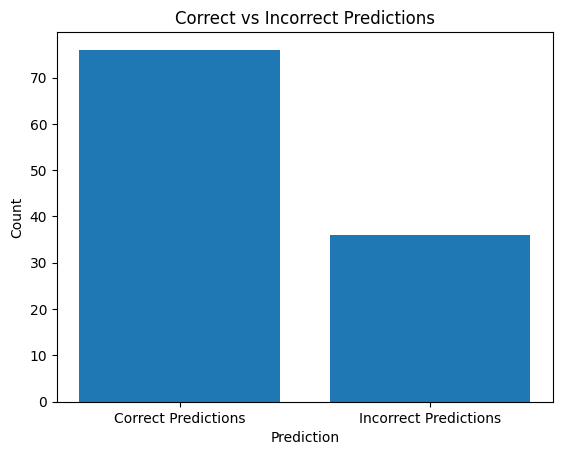

In [33]:
# Calculate the number of correct and incorrect predictions
# Calculate the total number of predictions
total_predictions = len(labeled_data)
correct_predictions = sum(labeled_data['is_requirement'] == labeled_data['actual_result'])
incorrect_predictions = total_predictions - correct_predictions

# Create a bar chart
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

plt.bar(labels, values)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()


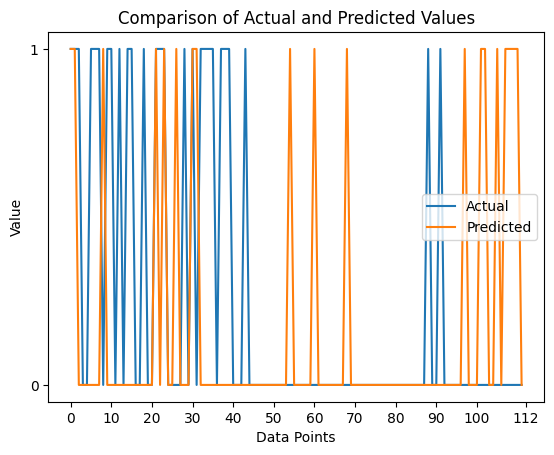

In [34]:
# Get the actual values and predicted values
actual_values = labeled_data['actual_result']
predicted_values = labeled_data['is_requirement']

# Create a line plot
x_values = range(len(actual_values))

plt.plot(x_values, actual_values, label='Actual')
plt.plot(x_values, predicted_values, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()

# Set y-axis tick labels to only 0 and 1
plt.yticks([0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 112])

plt.show()

In [1]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Get word frequencies from the dictionary
# word_frequencies = {dictionary[id]: freq for id, freq in dictionary.cfs.items()}

# # Create a WordCloud object
# wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_frequencies)

# # Plot the word cloud
# plt.figure(figsize=(8, 8))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Dictionary')
# plt.show()